Sajikan, deskripsikan, dan ringkas data secara visual dengan beberapa grafik. Diantaranya ialah sebagai berikut. <br>
- box plots <br>
- histogram <br>
- pie charts <br>
- bar charts <br>
- X-Y plots <br>
- heatmaps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium
import math
import statistics
import scipy.stats
from IPython.display import Math, Latex
%matplotlib inline

In [2]:
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.set_index('Country',inplace=True)
df_can.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.index.name=None

In [42]:
df_tot = df_can.sort_values('Total',ascending=False)
df_tot

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New Caledonia,Immigrants,Foreigners,909,Oceania,928,Melanesia,902,Developing regions,0,0,...,0,0,0,1,0,0,0,0,2,2744
San Marino,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,0,0,0,0,0,1,0,0,0,2739
Canada,Immigrants,Citizens,905,Northern America,905,Northern America,901,Developed regions,0,0,...,0,0,0,0,0,0,1,1,2,2731
Sao Tome and Principe,Immigrants,Foreigners,903,Africa,911,Middle Africa,902,Developing regions,0,0,...,1,1,0,0,1,2,0,0,1,2726


In [43]:
df_tot.loc['Japan']

Type                Immigrants
Coverage            Foreigners
AREA                       935
Continent                 Asia
REG                        906
Region            Eastern Asia
DEV                        901
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004    

In [6]:
years = list(range(1980,2014)) #list(map(str,range(1980,2014)))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [7]:
df_japan = df_can.loc[['Japan'],years].T
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


In [15]:
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1980 to 2013
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Japan   34 non-null     int64
dtypes: int64(1)
memory usage: 544.0+ bytes


In [8]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Variansi sample $ = \frac{\sum\limits^{n}_{i=0}(x_{n} - \bar{x})^{2}}{n-1}$

In [9]:
var_np = np.var(df_japan,ddof=1)
var_np

Japan    113717.173797
dtype: float64

Box plot

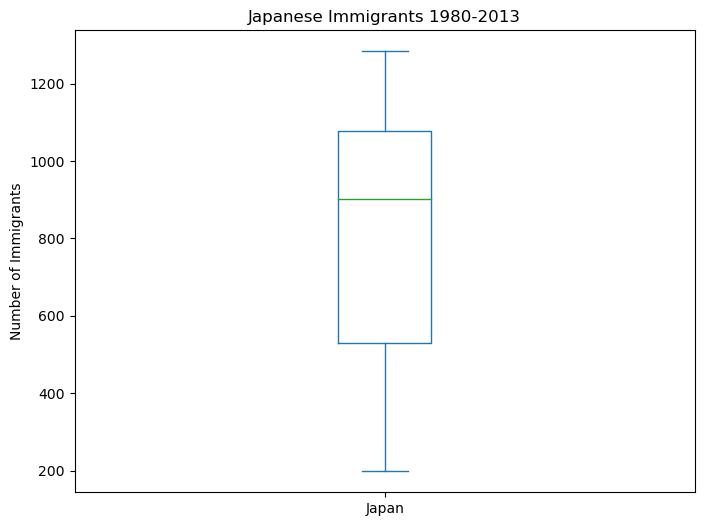

In [10]:
df_japan.plot(kind='box',figsize=(8,6))
plt.title('Japanese Immigrants 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

Box plot merupakan cara untuk merepresentasikan distribusi data melalui lima dimensi utama, yaitu : minimum, Q1, median(Q2), Q3, dan maksimum. <br>
Berdasarkan box plot yang diperoleh, dapat diasumsikan bahwa data-data "Japanese Immigrants 1980 - 2013" memiliki nilai-nilai pada lima dimensi utama sebagai berikut. <br>
- min $\leq$ 200 (garis terbawah) <br>
- Q1 $\leq$ 550 (garis bawah box) <br>
- median $\pm$ 900 (garis hijau) <br>  
- Q3 $\leq$ 1100(garis teratas) <br>
- max $\leq$ 1300 (garis atas box) 

Histogram

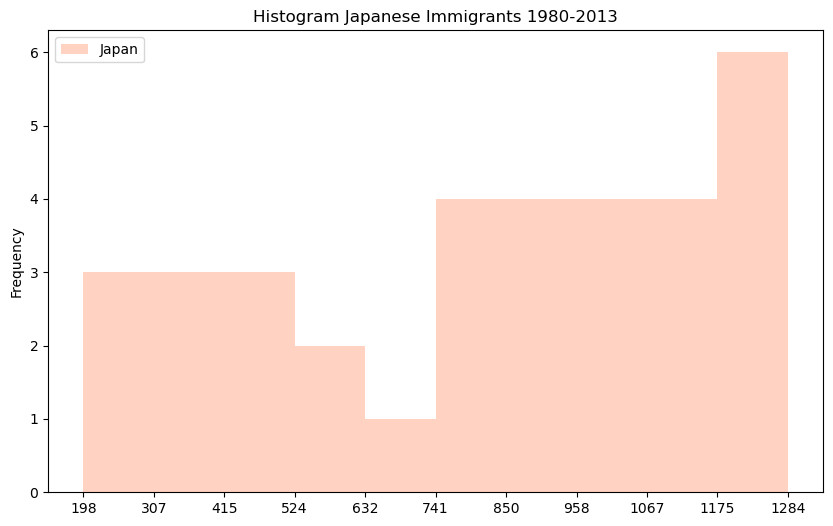

In [16]:
count, bin_edges = np.histogram(df_japan)
df_japan.plot(kind='hist',figsize=(10,6), bins=10,alpha=0.35,xticks=bin_edges, color='coral')
plt.title('Histogram Japanese Immigrants 1980-2013')
plt.show()

Histogram merupakan cara untuk merepresentasikan distribusi frekuensi dataset. <br>
Berdasarkan histogram yang diperoleh, dapat diasumsikan x merupakan jumlah imigran per tahun,  dan data-data  "Japanese Immigrants 1980 - 2013" memiliki nilai-nilai persebaran imigrant sebagai berikut. <br>
- Ada 9 data tahun yang memiliki jumlah imigran $x \leq 524$ <br>
- Ada 2 data tahun yang memiliki jumlah imigran diantara $524\leq x \leq 632$ <br>
- Ada 1 data tahun yang memiliki jumlah imigran diantara $632\leq x \leq 741$ <br>  
- Ada 16 data tahun yang memiliki jumlah imigran diantara $741\leq x \leq 1175$ <br>
- Ada 6 data tahun yang memiliki jumlah imigran diantara $1175\leq x \leq 1284$ 

Bar chart

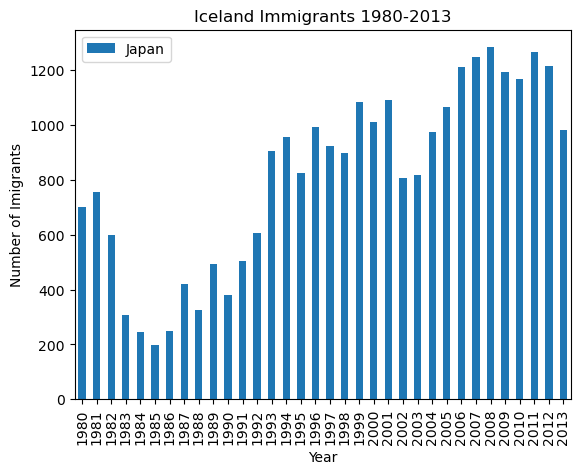

In [44]:
df_japan.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Imigrants')
plt.title('Japan Immigrants 1980-2013')
plt.show()

Bar plot merupakan cara merepresentasikan data dengan sumbu x digunakan untuk labelliing dan sumbu y atau panjang batang akan bersesuaian dengan besaran variabel yang diukur <br>
Dalam hal ini, diperoleh data imigran jepang pada tahun 1980 sebanyak $\pm 700$ orang, pada tahun 2013 sebanyak $\pm 1000$ orang, jumlah imigran sedikit terjadi pada tahun 1985, dan jumlah imigran terbanyak pada tahun 2008.

X-Y plot

In [76]:
list(range(1980,2014))

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [77]:
# Dengan scatplot cari perbandingan antar tahun dan total imigran
df_tot = df_can[years].sum(axis=0).to_frame()

df_tot.index = df_tot.index.astype(int) #convert jadi integer

df_tot.reset_index(inplace=True)

df_tot.rename(columns={'index':'year',0:'total'},inplace=True)

df_tot.head()

KeyError: "None of [Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',\n       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',\n       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',\n       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],\n      dtype='object')] are in the [columns]"

In [75]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [71]:
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

Pie chart

In [61]:
df_continents = df_can.groupby('Continent').sum()
df_continents.head()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,48762,49242,48708,3951,4363,3819,2671,2639,2650,3782,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,45815,109147,44197,31025,34314,30214,24696,27274,23850,28739,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39044,39754,38743,39760,44802,42720,24638,22287,20844,24370,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,29832,30395,29766,13081,15215,16769,15427,13678,15171,21179,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,1810,1810,1802,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564


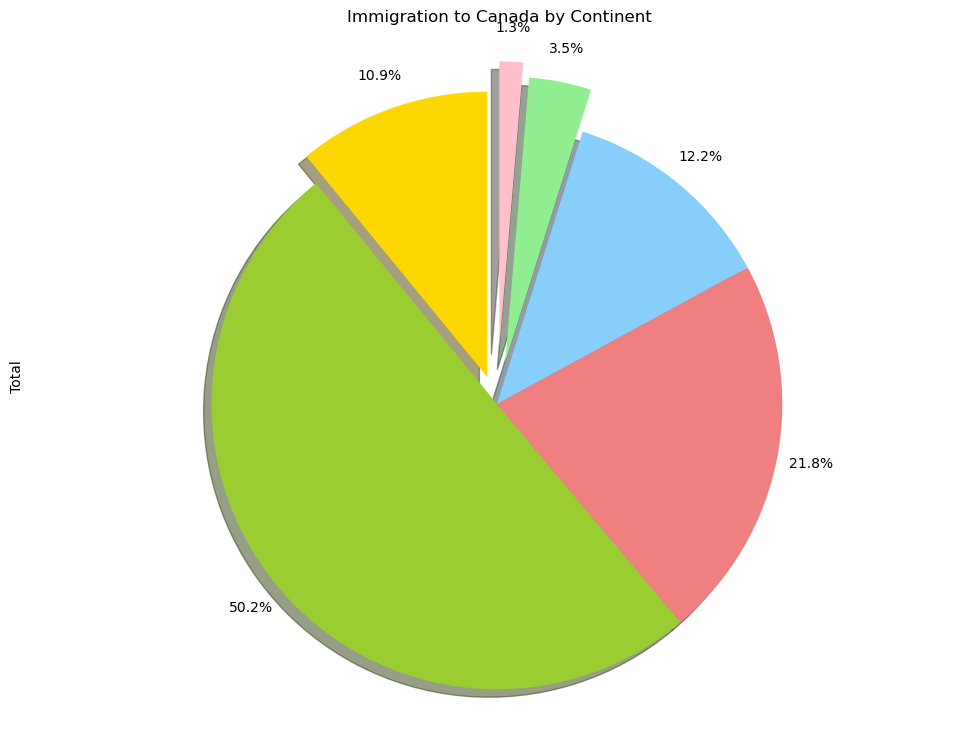

In [65]:
df_continents['Total'].plot(kind='pie',
                          figsize=(12,9),
                          autopct='%1.1f%%',
                          startangle=90,
                          shadow=True,
                          labels=None,
                          pctdistance=1.12,
                          colors=colors_list,
                          explode=explode_list)

plt.title('Immigration to Canada by Continent')
plt.axis('equal')
plt.show()

KeyError: '2013'